<h3> Import required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from matplotlib import style
style.use('grayscale')
warnings.filterwarnings('ignore')

<h4> Read in the dataset

In [2]:
df= pd.read_csv('/Users/Brenden/Downloads/Dataset/credit_card.csv')
pd.set_option('display.max_columns',None)

<h4> Display the first 5 & last 5 rows of the dataset

In [3]:
df.head()

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
df.tail()

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
685,685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
689,689,15592412,1,41.00,0.040,2,10,4,0.040,0,1,1,0,1,560,1,1


<h3> Check the dimensions of the dataset

In [5]:
df.shape

(690, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   690 non-null    int64  
 1   Customer_ID  690 non-null    int64  
 2   A_1          690 non-null    int64  
 3   A_2          690 non-null    float64
 4   A_3          690 non-null    float64
 5   A_4          690 non-null    int64  
 6   A_5          690 non-null    int64  
 7   A_6          690 non-null    int64  
 8   A_7          690 non-null    float64
 9   A_8          690 non-null    int64  
 10  A_9          690 non-null    int64  
 11  A_10         690 non-null    int64  
 12  A_11         690 non-null    int64  
 13  A_12         690 non-null    int64  
 14  A_13         690 non-null    int64  
 15  A_14         690 non-null    int64  
 16  class        690 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 91.8 KB


<h3> Data Preprocessing 

In [7]:
#change columns names to lowercase
df.columns= df.columns.str.lower()

<h5> Drop unnecessary columns

In [8]:
df.drop(columns=['unnamed: 0','customer_id'],axis=1,inplace=True)

<h4> Check for null values

In [9]:
df.isna().sum()

a_1      0
a_2      0
a_3      0
a_4      0
a_5      0
a_6      0
a_7      0
a_8      0
a_9      0
a_10     0
a_11     0
a_12     0
a_13     0
a_14     0
class    0
dtype: int64

<h4> Check for duplicate values

In [10]:
df.duplicated().sum()

0

<h3> Get an overview of the overal statistics of the dataset

In [11]:
df.describe()

,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,a_11,a_12,a_13,a_14,class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


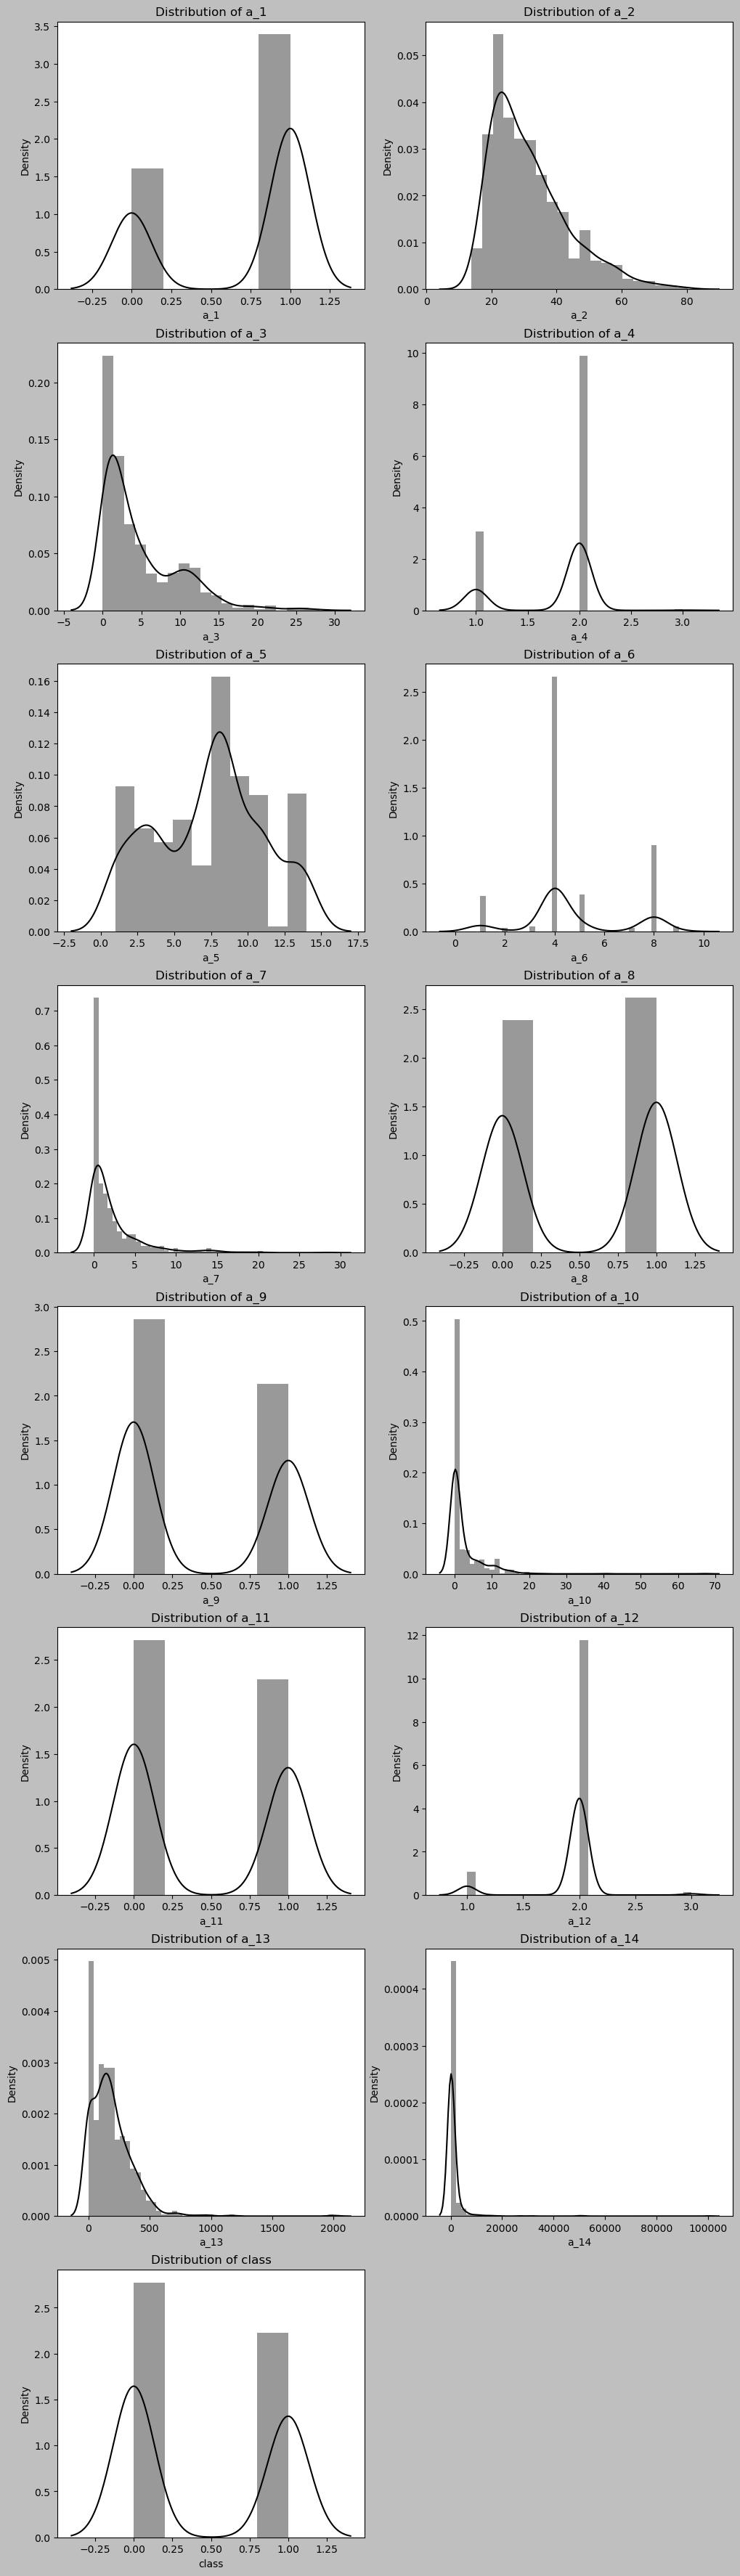

In [12]:
var=['a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9','a_10','a_11','a_12','a_13','a_14','class']

plt.figure(figsize=(12,45))
for i, col in enumerate(var):
  plt.subplot(8,2,i+1)
  sns.distplot(df[col])
  plt.title(f'Distribution of {col}')
plt.show()

<h3> Store feature matrix in X & response in vector y

In [13]:
X= df.drop('class',axis=1)
y= df['class']

<h4> Scale the dataset

In [14]:
from sklearn.preprocessing import RobustScaler

rob= RobustScaler()

In [15]:
X_scaled=rob.fit_transform(X)
y_scaled= rob.fit_transform(y.values.reshape(-1,1))

<h4> Spliting the data into training & testing sets

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y_scaled,test_size=0.30,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 14), (207, 14), (483, 1), (207, 1))

<h3> Import & train the models on the training set

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [20]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
pred= rf.predict(X_test)
acc1=accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       126
         1.0       0.83      0.84      0.83        81

    accuracy                           0.87       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.87      0.87      0.87       207



In [22]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [23]:
pred= lr.predict(X_test)
acc2=accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       126
         1.0       0.84      0.80      0.82        81

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.86       207
weighted avg       0.86      0.86      0.86       207



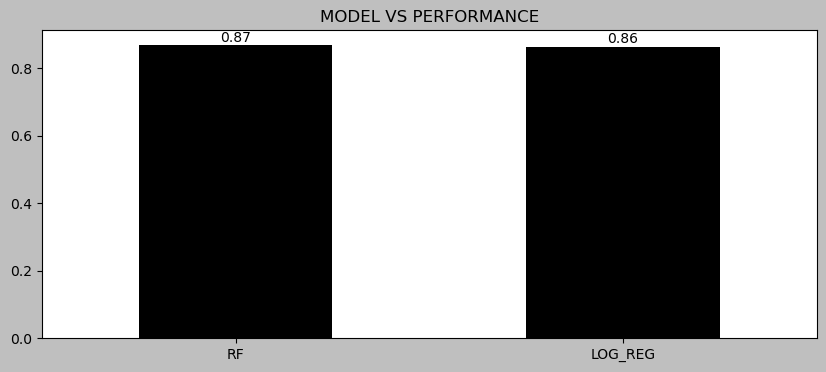

In [24]:
score= pd.Series([acc1,acc2],['RF','LOG_REG'])
score.plot(kind='bar',figsize=(10,4))
plt.xticks(rotation=0,ha='center')
plt.title('MODEL VS PERFORMANCE')
for i,v in enumerate(score):
    plt.text(i,v +0.01, str(round(v,2)),ha='center')

plt.show()

We can see that Random Forest model outperforms the logistic regression model 